In [1]:
import pandas as pd

df = pd.read_csv("Salary_dataset.csv")
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [2]:
# drop un-necessary column
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


<Axes: xlabel='YearsExperience', ylabel='Salary'>

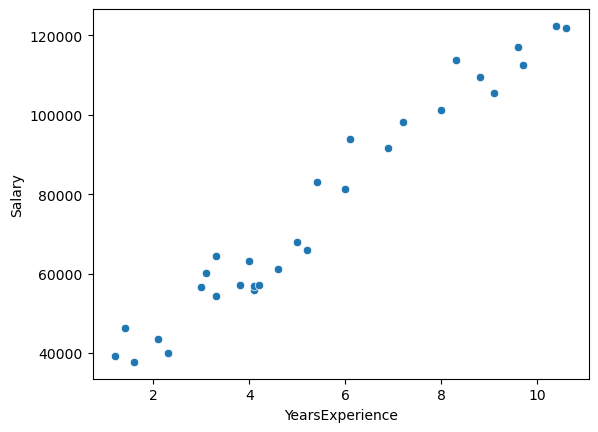

In [3]:
import seaborn as sns

sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])

In [4]:
# dublicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
# train_test_split

from sklearn.model_selection import train_test_split


X = df['YearsExperience']
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=True, random_state=42)
X_train

23     8.3
17     5.4
8      3.3
9      3.8
28    10.4
24     8.8
12     4.1
0      1.2
4      2.3
16     5.2
5      3.0
13     4.2
11     4.1
22     8.0
1      1.4
2      1.6
25     9.1
3      2.1
21     7.2
26     9.6
18     6.0
29    10.6
20     6.9
7      3.3
10     4.0
14     4.6
19     6.1
6      3.1
Name: YearsExperience, dtype: float64

<Axes: xlabel='YearsExperience'>

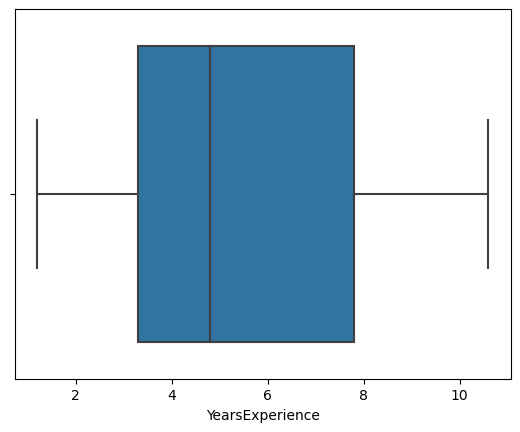

In [6]:
# detect/ handle NaNs
# detect / handle outliers

sns.boxplot(x=df['YearsExperience'])

<Axes: xlabel='Salary'>

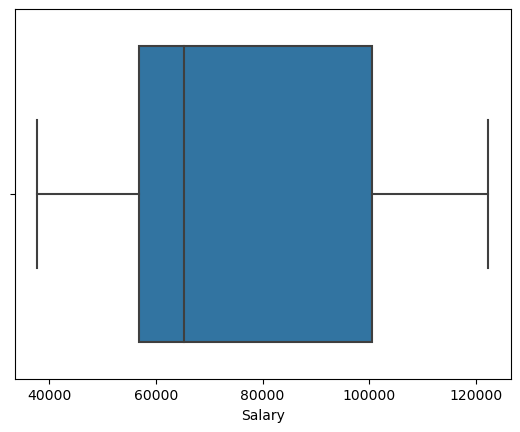

In [7]:
sns.boxplot(x=df['Salary'])

In [8]:
# Encoding

In [9]:
# imbalanced

In [10]:
X_train = X_train.to_frame() # to convert data to be 2D for scalers and model
X_test = X_test.to_frame()

In [11]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [12]:
# Modeling:
## Simple Linear Regression parameters: X, y
# y_hat = W1*X + W0

In [13]:
### OLS Solution
# W1 = Cov(X, y)/ Var(X)
# W0 = Y_mean - W1 * X_mean

#### Try numpy tools to see results

In [14]:
import numpy as np 
np.cov(X, y)

array([[8.05360920e+00, 7.61063034e+04],
       [7.61063034e+04, 7.51550960e+08]])

In [15]:
np.var(y)

726499261.7333333

In [16]:
np.cov(X, y)[0, 1]

76106.30344827585

In [17]:
np.var(X)

7.785155555555556

In [18]:
W1 = np.cov(X, y)[0, 1] / np.var(X)
W1

9775.823091160422

In [19]:
# W0 = Y_mean - W1 * X_mean
W0 = np.mean(y) - W1 * np.mean(X)
W0

23084.210999851588

### But Let's Build it without numpy ready tools

In [20]:
def get_mean(data):
    return sum(data) / len(data)

def get_var(data):
    return sum((data - get_mean(data)) ** 2) / len(data)

def get_cov(data_X, data_y):
    return sum((data_X - get_mean(data_X)) * (data_y - get_mean(data_y))) / len(data_X)

def get_error(y_true, y_hat):
    return (1/(2 * len(y_hat))) * sum((y_hat - y_true)**2)

def get_predict(X, w1, w0):
    y_hat = W1 * X + W0
    return y_hat

### OLS Solution
# W1 = Cov(X, y)/ Var(X)
# W0 = Y_mean - W1 * X_mean
W1 = get_cov(X, y) / get_var(X)
W0 = get_mean(y) - W1 * get_mean(X)
W1, W0

(9449.96232145508, 24848.20396652318)

In [21]:
y_hat = W1 * X + W0
y_hat

0      36188.158752
1      38078.151217
2      39968.143681
3      44693.124842
4      46583.117306
5      53198.090931
6      54143.087163
7      56033.079627
8      56033.079627
9      60758.060788
10     62648.053252
11     63593.049484
12     63593.049484
13     64538.045717
14     68318.030645
15     72098.015574
16     73988.008038
17     75878.000502
18     81547.977895
19     82492.974127
20     90052.943985
21     92887.932681
22    100447.902538
23    103282.891235
24    108007.872395
25    110842.861092
26    115567.842252
27    116512.838485
28    123127.812110
29    125017.804574
Name: YearsExperience, dtype: float64

In [22]:
df['y_hat'] = y_hat
df

,YearsExperience,Salary,y_hat
0,1.2,39344.0,36188.158752
1,1.4,46206.0,38078.151217
2,1.6,37732.0,39968.143681
3,2.1,43526.0,44693.124842
4,2.3,39892.0,46583.117306
5,3.0,56643.0,53198.090931
6,3.1,60151.0,54143.087163
7,3.3,54446.0,56033.079627
8,3.3,64446.0,56033.079627
9,3.8,57190.0,60758.060788


In [23]:
get_error(df['Salary'], df['y_hat'])

15635475.861140482

### Let's Try sklearn ready model and compare our results

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()
lr

LinearRegression()

In [26]:
lr.fit(X.to_frame(), y)

LinearRegression()

In [27]:
lr.intercept_ # w0

24848.203966523208

In [28]:
W0

24848.20396652318

In [29]:
lr.coef_ # W1

array([9449.96232146])

In [30]:
W1

9449.96232145508

### Results are nearly the same with rounding

In [31]:
y_hat = lr.predict(X.to_frame())
df['y_hat_lr'] = y_hat
df

,YearsExperience,Salary,y_hat,y_hat_lr
0,1.2,39344.0,36188.158752,36188.158752
1,1.4,46206.0,38078.151217,38078.151217
2,1.6,37732.0,39968.143681,39968.143681
3,2.1,43526.0,44693.124842,44693.124842
4,2.3,39892.0,46583.117306,46583.117306
5,3.0,56643.0,53198.090931,53198.090931
6,3.1,60151.0,54143.087163,54143.087163
7,3.3,54446.0,56033.079627,56033.079627
8,3.3,64446.0,56033.079627,56033.079627
9,3.8,57190.0,60758.060788,60758.060788


In [32]:
from sklearn.metrics import r2_score

r2_score(y, y_hat) # for accuracy 

0.9569566641435086

In [33]:
lr.score(X.to_frame(), y) # or use kr.score directly

0.9569566641435086

In [34]:
df

,YearsExperience,Salary,y_hat,y_hat_lr
0,1.2,39344.0,36188.158752,36188.158752
1,1.4,46206.0,38078.151217,38078.151217
2,1.6,37732.0,39968.143681,39968.143681
3,2.1,43526.0,44693.124842,44693.124842
4,2.3,39892.0,46583.117306,46583.117306
5,3.0,56643.0,53198.090931,53198.090931
6,3.1,60151.0,54143.087163,54143.087163
7,3.3,54446.0,56033.079627,56033.079627
8,3.3,64446.0,56033.079627,56033.079627
9,3.8,57190.0,60758.060788,60758.060788


In [35]:
from sklearn.metrics import mean_squared_error
## not same result as ours bcz its build to calc only sum((ytrue - yhat)**2) 
## without scaling by 1/2

result = mean_squared_error(y, df['y_hat_lr'])
result

31270951.722280957

In [36]:
result / (2) # now the same

15635475.861140478

## Model train on train_data_only

In [37]:
# fit on train data then calc accuracy
lr.fit(X_train, y_train)
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)
print(f"train data accuracy: {lr.score(X_train, y_train)}")
print(f"test data accuracy: {lr.score(X_test, y_test)}")
# bcz test data was 2 points only

train data accuracy: 0.9556802978830419
test data accuracy: 0.9601741102589808


In [38]:
#  test model on new data
test_data = std_scaler.transform(np.array(10.7).reshape(-1, 1))
lr.predict(test_data)

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([126654.79483384])